In [2]:
from classes_V3 import *

In [3]:
d = DC_IV('sample_6')

In [4]:
#d.draw_all_graphs()

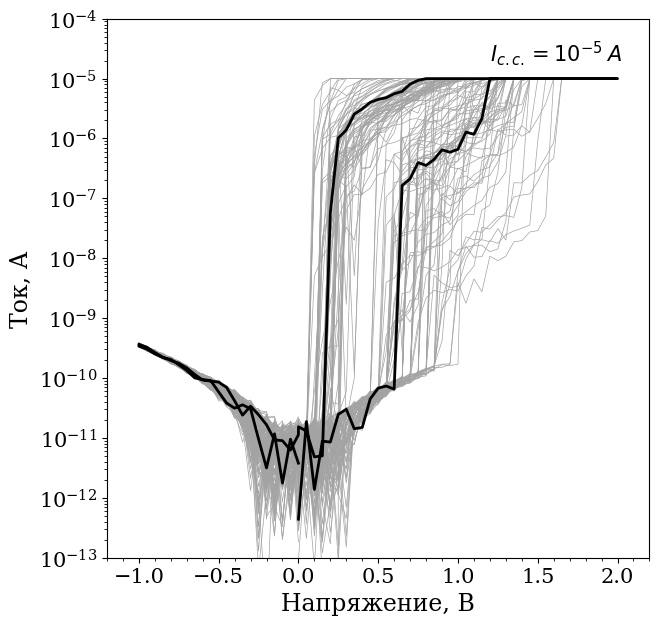

In [ ]:
fig, ax = plt.subplots(figsize = [7,7])
plt.rcParams.update({'font.family':'serif'})
d.draw_multiple_lines('G8-100', ax, measurs=[i for i in range(15,127) if i not in [j for j in range(27,66)]], linewidth = 0.5, color = '#a3a3a3')
d.draw_single_line('G8-100', ax, 70, color = 'k', linewidth = 2)
ax.set(yscale='log', xlim=[-1.2, 2.2], ylim=[10**-(13), 10**-4])
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.tick_params(labelsize=15)
ax.set_ylabel('Ток, А', size = 17)
ax.set_xlabel('Напряжение, В', size = 17)
ax.text(1.2, 2 * 10 ** -5, r'$I_{c.c.} = 10^{-5} \;A$', size = 15)

#plt.savefig('final_typical.png', dpi = 300, bbox_inches = 'tight')

(array([ 2.,  3.,  3.,  6.,  7.,  7.,  5.,  3.,  3.,  2., 10.,  6.,  6.,
         5.,  5.]),
 array([1.34200004e-11, 1.58080004e-11, 1.81960004e-11, 2.05840005e-11,
        2.29720005e-11, 2.53600006e-11, 2.77480006e-11, 3.01360006e-11,
        3.25240007e-11, 3.49120007e-11, 3.73000008e-11, 3.96880008e-11,
        4.20760008e-11, 4.44640009e-11, 4.68520009e-11, 4.92400010e-11]),
 <BarContainer object of 15 artists>)

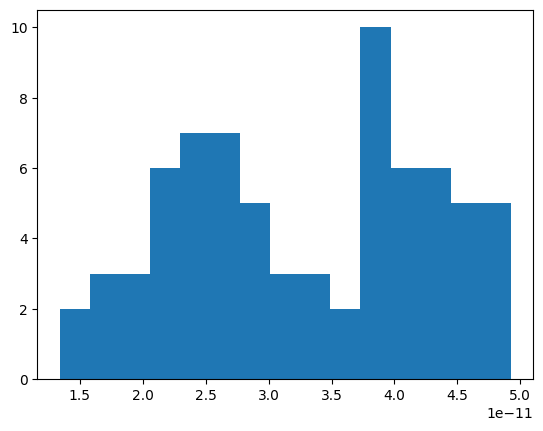

In [6]:
I = d.get_on_off_current('G8-100', 0.4, measurs=[i for i in range(15,127) if i not in [j for j in range(27,66)]])
plt.hist(I['on'], bins=15)

(array([13.,  9., 12.,  9.,  7.,  2.,  4.,  2.,  1.,  0.,  2.,  1.,  1.,
         0., 10.]),
 array([1.15100001e-07, 7.74226649e-07, 1.43335330e-06, 2.09247995e-06,
        2.75160659e-06, 3.41073324e-06, 4.06985989e-06, 4.72898654e-06,
        5.38811319e-06, 6.04723984e-06, 6.70636648e-06, 7.36549313e-06,
        8.02461978e-06, 8.68374643e-06, 9.34287308e-06, 1.00019997e-05]),
 <BarContainer object of 15 artists>)

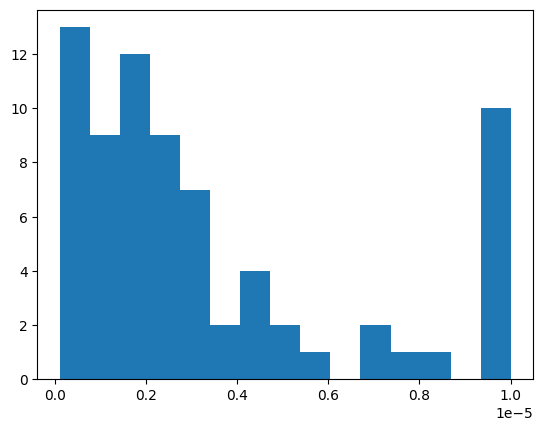

In [7]:
plt.hist(I['off'], bins=15)

[None]

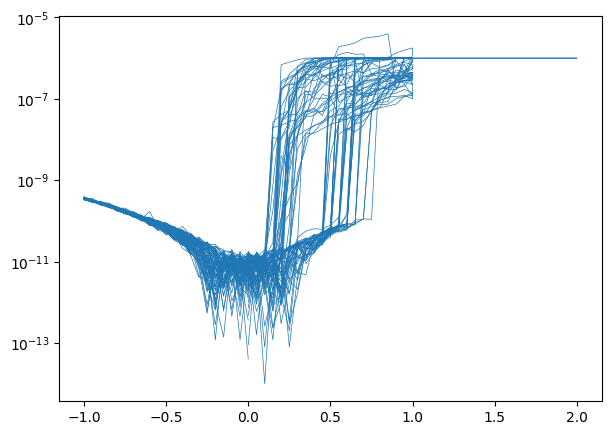

In [8]:
fig, ax = plt.subplots(figsize = [7,5])

d.draw_multiple_lines('G8-100', ax, measurs= [j for j in range(27,66)], linewidth = 0.5)
ax.set(yscale='log')

[None]

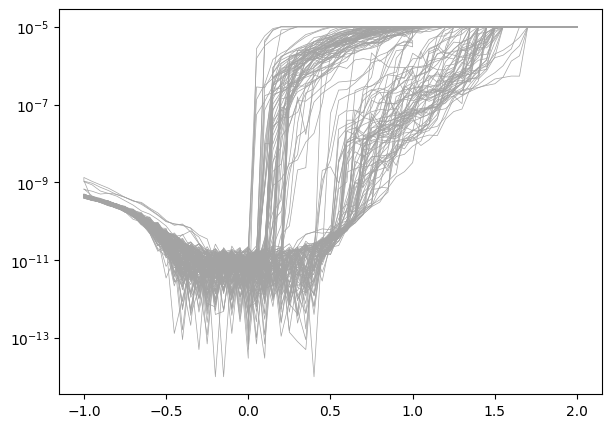

In [9]:
fig, ax = plt.subplots(figsize = [7,5])

d.draw_multiple_lines('F20-100', ax, linewidth = 0.5, color = '#a3a3a3')
ax.set(yscale='log')